Automatically created module for IPython interactive environment


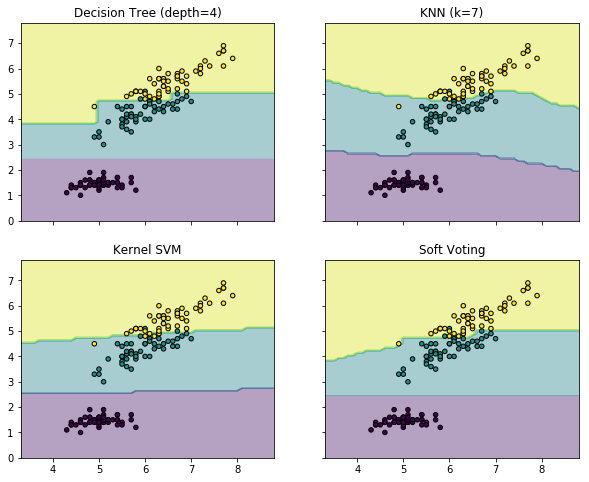

In [1]:
print(__doc__)

from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()


Created on Wed Apr 17 15:23:46 2019

@author: litha

DecisionTree with features [0, 1] has a score of 0.89
RandomForest with 30 estimators with features [0, 1] has a score of 0.89
ExtraTrees with 30 estimators with features [0, 1] has a score of 0.89
AdaBoost with 30 estimators with features [0, 1] has a score of 0.89
DecisionTree with features [0, 2] has a score of 0.99
RandomForest with 30 estimators with features [0, 2] has a score of 0.98
ExtraTrees with 30 estimators with features [0, 2] has a score of 0.99
AdaBoost with 30 estimators with features [0, 2] has a score of 0.99
DecisionTree with features [2, 3] has a score of 0.99
RandomForest with 30 estimators with features [2, 3] has a score of 0.99
ExtraTrees with 30 estimators with features [2, 3] has a score of 0.99
AdaBoost with 30 estimators with features [2, 3] has a score of 0.99


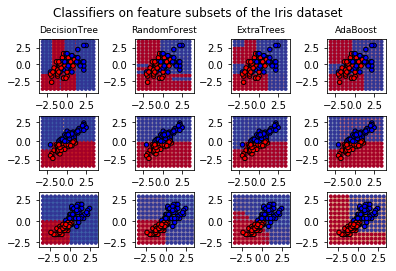

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 17 15:23:46 2019

@author: litha
"""

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features
        X = iris.data[50:, pair]
        y = iris.target[50:]

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 17 20:24:03 2019

@author: litha
"""

# -*- coding: utf-8 -*-
"""
Created on Wed Apr 17 15:23:46 2019

@author: litha
"""

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier,BaggingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.externals.six import StringIO 
import pydot
def print_tree(estimator):
        
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right
    feature = estimator.tree_.feature
    threshold = estimator.tree_.threshold
    
    
    # The tree structure can be traversed to compute various properties such
    # as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1
    
        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True
    
    print("The binary tree structure has %s nodes and has "
          "the following tree structure:"
          % n_nodes)
    for i in range(n_nodes):
        if is_leaves[i]:
            print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
        else:
            print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
                  "node %s."
                  % (node_depth[i] * "\t",
                     i,
                     children_left[i],
                     feature[i],
                     threshold[i],
                     children_right[i],
                     ))
    print()

def visualize_classifier(name,model,pair, X, y, ax=None, cmap='spring'):
    ax = ax or plt.gca()
    ax.set_facecolor('cyan')
    #colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    #cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot_colors = "ryb"
    #ax.title = name
    # Plot the training points
    #ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
     #          clim=(y.min(), y.max()), zorder=3)
     # Parameters
     #n_classes = 3
     
     #plot_step = 0.02
     #for i, color in zip(range(n_classes), plot_colors):
     #   idx = np.where(y == i)
      #  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
      #              cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    for labels,values, columns in zip(('versicolor','virginica'),(1, 2),('red', 'blue')):
        plt.scatter(X[y==values, 0],X[y==values, 1], label=labels, c=columns, marker='*', s=50)
        #ax.axis('tight')
        #ax.axis('off')
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
    
    # fit the estimator
    #model.fit(X, y)
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)
    model.fit(X_train, y_train)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.7,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=0)

    ax.set(xlim=xlim, ylim=ylim)
    print (iris.target_names[1:])
    #plt.draw()
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.legend(loc='best') 
    plt.xticks()
    plt.yticks()
    plt.title(name)  
    plt.show(block=False)
    plt.pause(2)
    plt.close()



Created on Wed Apr 17 15:23:46 2019

@author: litha



['versicolor' 'virginica']


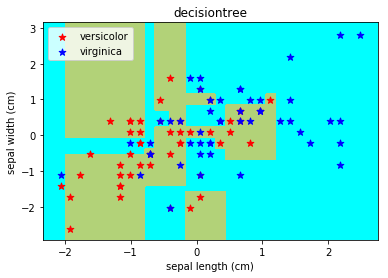

DecisionTree with features [0, 1] has a score of 0.8
['versicolor' 'virginica']


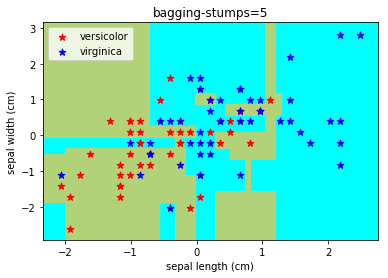

Bagging with 5 estimators with features [0, 1] has a score of 0.77
Bagging with 6 estimators with features [0, 1] has a score of 0.8
Bagging with 7 estimators with features [0, 1] has a score of 0.77
Bagging with 8 estimators with features [0, 1] has a score of 0.78
Bagging with 9 estimators with features [0, 1] has a score of 0.77
['versicolor' 'virginica']


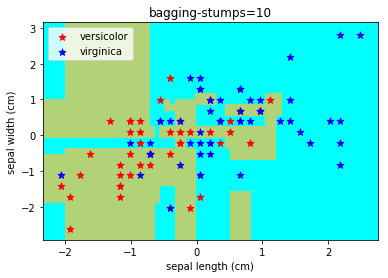

Bagging with 10 estimators with features [0, 1] has a score of 0.77
Bagging with 11 estimators with features [0, 1] has a score of 0.76
Bagging with 12 estimators with features [0, 1] has a score of 0.76
Bagging with 13 estimators with features [0, 1] has a score of 0.77
Bagging with 14 estimators with features [0, 1] has a score of 0.77
['versicolor' 'virginica']


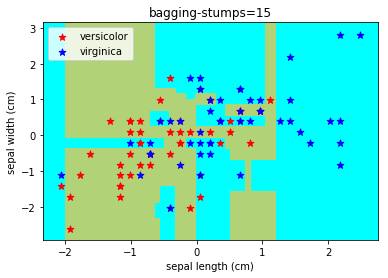

Bagging with 15 estimators with features [0, 1] has a score of 0.77
Bagging with 16 estimators with features [0, 1] has a score of 0.77
Bagging with 17 estimators with features [0, 1] has a score of 0.77
Bagging with 18 estimators with features [0, 1] has a score of 0.77
Bagging with 19 estimators with features [0, 1] has a score of 0.77
['versicolor' 'virginica']


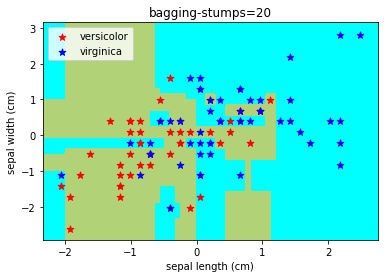

Bagging with 20 estimators with features [0, 1] has a score of 0.78


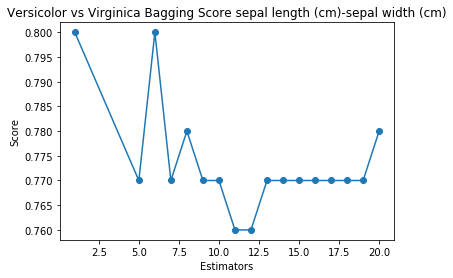

['versicolor' 'virginica']


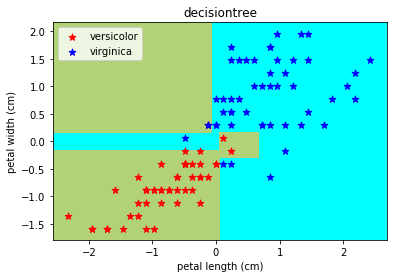

DecisionTree with features [2, 3] has a score of 0.98
['versicolor' 'virginica']


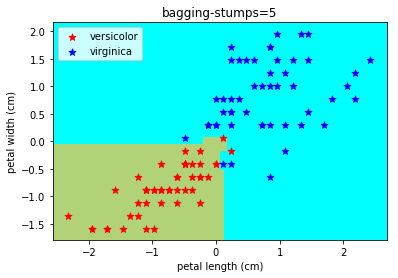

Bagging with 5 estimators with features [2, 3] has a score of 0.98
Bagging with 6 estimators with features [2, 3] has a score of 0.97
Bagging with 7 estimators with features [2, 3] has a score of 0.98
Bagging with 8 estimators with features [2, 3] has a score of 0.98
Bagging with 9 estimators with features [2, 3] has a score of 0.97
['versicolor' 'virginica']


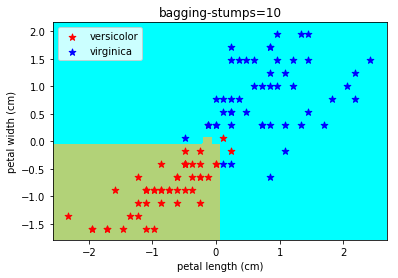

Bagging with 10 estimators with features [2, 3] has a score of 0.97
Bagging with 11 estimators with features [2, 3] has a score of 0.97
Bagging with 12 estimators with features [2, 3] has a score of 0.98
Bagging with 13 estimators with features [2, 3] has a score of 0.98
Bagging with 14 estimators with features [2, 3] has a score of 0.99
['versicolor' 'virginica']


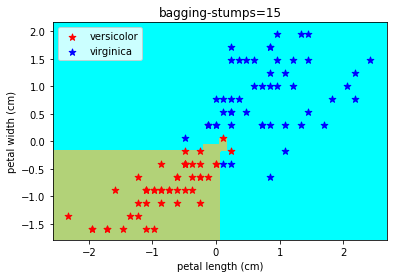

Bagging with 15 estimators with features [2, 3] has a score of 0.98
Bagging with 16 estimators with features [2, 3] has a score of 0.99
Bagging with 17 estimators with features [2, 3] has a score of 0.99
Bagging with 18 estimators with features [2, 3] has a score of 0.99
Bagging with 19 estimators with features [2, 3] has a score of 0.99
['versicolor' 'virginica']


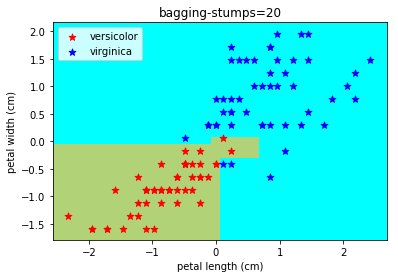

Bagging with 20 estimators with features [2, 3] has a score of 0.99


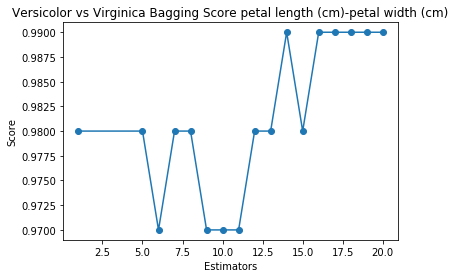

In [8]:

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 2  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1
'''
models = dict(decisiontree=DecisionTreeClassifier(max_depth=None),
          randomforest=RandomForestClassifier(n_estimators=n_estimators),
          extratrees=ExtraTreesClassifier(n_estimators=n_estimators),
          adaboost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators),
          bagging = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5))
'''

for pair in ([0, 1],[2, 3]):
    model_score = []
    model_est = []
    models = [['decisiontree',DecisionTreeClassifier(max_depth=None),1]]
    for n_estimators in range(5,21,1):    
        models.append(['bagging',BaggingClassifier(DecisionTreeClassifier(max_depth=None),n_estimators=n_estimators,random_state=0),n_estimators])  
  #  for n_estimators in range(5,21,1):    
  #      models.append(['extratrees',ExtraTreesClassifier(n_estimators=n_estimators),n_estimators])  
    
    for modelitem in models:
        name = modelitem[0]
        model = modelitem[1]
        esimators = modelitem[2]
        model_est.append(esimators)
        # We only take the two corresponding features
        X = iris.data[:, pair][50:]
        y = iris.target[50:]
        #print(iris.feature_names[pair[0]])
        #print(X)
        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        if ((esimators == 1) or (esimators % 5) == 0) :
            visualize_classifier(name+'-stumps='+str(esimators) if name == 'bagging' else name,model,pair, X, y)
        # Train]
        #model.fit(X, y)
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)
        model.fit(X_train, y_train)
        scores = model.score(X, y)
        #scores = cross_val_score(model, X_test, y_test, cv=5).mean()
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]
        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)
        model_score.append(scores)
        if name == 'decisiontree' :
            #print_tree(model) 
            dot_data = StringIO()
            tree.export_graphviz(model,out_file=dot_data)
            graph = pydot.graph_from_dot_data(dot_data.getvalue())
            graph[0].write_pdf("iris.pdf") 
            
            
        '''    
            scores = model.score(X, y)
            # Create a title for each column and the console by using str() and
            # slicing away useless parts of the string
            model_title = str(type(model)).split(
                ".")[-1][:-2][:-len("Classifier")]
    
            model_details = model_title
            if hasattr(model, "estimators_"):
                model_details += " with {} estimators".format(
                    len(model.estimators_))
            print(model_details + " with features", pair,
                  "has a score of", scores)
    
            plt.subplot(3, 4, plot_idx)
            if plot_idx <= len(models):
                # Add a title at the top of each column
                plt.title(model_title, fontsize=9)
    
            # Now plot the decision boundary using a fine mesh as input to a
            # filled contour plot
            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                                 np.arange(y_min, y_max, plot_step))
    
            # Plot either a single DecisionTreeClassifier or alpha blend the
            # decision surfaces of the ensemble of classifiers
            if isinstance(model, DecisionTreeClassifier):
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, cmap=cmap)
            else:
                # Choose alpha blend level with respect to the number
                # of estimators
                # that are in use (noting that AdaBoost can use fewer estimators
                # than its maximum if it achieves a good enough fit early on)
                estimator_alpha = 1.0 / len(model.estimators_)
                for tree in model.estimators_:
                    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                    Z = Z.reshape(xx.shape)
                    cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
    
            # Build a coarser grid to plot a set of ensemble classifications
            # to show how these are different to what we see in the decision
            # surfaces. These points are regularly space and do not have a
            # black outline
            xx_coarser, yy_coarser = np.meshgrid(
                np.arange(x_min, x_max, plot_step_coarser),
                np.arange(y_min, y_max, plot_step_coarser))
            Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                             yy_coarser.ravel()]
                                             ).reshape(xx_coarser.shape)
            cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                    c=Z_points_coarser, cmap=cmap,
                                    edgecolors="none")
    
            # Plot the training points, these are clustered together and have a
            # black outline
            plt.scatter(X[:, 0], X[:, 1], c=y,
                        cmap=ListedColormap(['r', 'y', 'b']),
                        edgecolor='k', s=20)
            plot_idx += 1  # move on to the next plot in sequence
    
    plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
    plt.axis("tight")
    plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
    plt.show()
    '''
    plt.plot(model_est[:],model_score[:], marker='o')
    plt.xlabel('Estimators')
    plt.ylabel('Score')
    plt.title('Versicolor vs Virginica Bagging Score %s-%s'%(iris.feature_names[pair[0]],iris.feature_names[pair[1]]))
    plt.pause(5)
    plt.show()
    plt.close()